## Machine Learning 

### Rice + Maize - Drought Model - Word2Vec

In [ ]:
#!pip install lazypredict

In [1]:
# Import Libs
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
rice_df = pd.read_excel('rice_word2vec_4mer_dataset.xlsx')
rice_df

,circName,stress,tissue,chr,start,end,strand,start_anno,wc_4mer_1,wc_4mer_2,...,wc_4mer_247,wc_4mer_248,wc_4mer_249,wc_4mer_250,wc_4mer_251,wc_4mer_252,wc_4mer_253,wc_4mer_254,wc_4mer_255,wc_4mer_256
0,osa-circ1-OS01T0723400,-,multipleTissue,1,30167620,30167771,+,"exon,CDS",-9.631496,-0.634460,...,-3.650220,-6.532469,-10.394247,-18.915748,-8.209992,20.900938,10.121081,-8.663392,-3.891558,16.968743
1,osa-circ2-OS03T0223400,-,multipleTissue,3,6461672,6462146,-,"exon,CDS",11.717988,-33.785251,...,65.037102,-54.414726,-7.826274,1.359892,10.894437,115.083468,-11.790173,-90.684992,-113.248148,-76.719906
2,osa-circ3-OS11T0210300,-,multipleTissue,11,5715883,5716030,-,"exon,CDS",75.045112,25.410396,...,-69.418313,2.976611,-89.222495,-14.065688,-11.113202,13.712974,-9.093328,18.582649,36.676268,28.016192
3,osa-circ4-OS02T0200900,-,multipleTissue,2,5631023,5631244,-,"exon,CDS",69.991090,-35.909958,...,10.868538,-94.599972,4.269204,58.609413,36.129650,66.836573,-36.547408,-34.347736,-103.831539,15.517953
4,osa-circ5-OS05T0494800,-,multipleTissue,5,24302336,24302448,+,"exon,CDS",8.813747,-11.765227,...,-32.298986,75.309151,-70.483905,-60.826504,-24.527909,-15.224254,49.960103,-62.473183,50.843977,62.039499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63043,osa-circ63044--,-,multipleTissue,9,15388901,15389056,-,"exon,",15.887059,-31.969328,...,45.250753,-19.178890,-1.061974,16.301666,13.137755,22.852011,0.295493,-14.700049,-77.186784,-3.278817
63044,osa-circ63045--,-,multipleTissue,9,18686229,18686405,+,"exon,CDS",72.220651,-110.738782,...,-48.321259,79.439987,-123.390628,-55.596979,-22.602682,-43.675255,106.226306,9.070637,68.216420,104.283014
63045,osa-circ63046--,-,multipleTissue,1,21073588,21073752,+,"exon,",58.936520,-69.216141,...,-52.329599,58.537718,-105.692244,-48.018427,-0.692793,-38.445677,65.961949,-46.768989,-3.477565,67.217593
63046,osa-circ63047--,-,multipleTissue,3,26460884,26461022,+,"exon,CDS",13.613990,-23.489950,...,-13.301322,-17.453506,-12.781476,-5.919883,15.249080,18.327202,-24.019598,-30.656558,-25.248802,11.374978


In [4]:
maize_df = pd.read_excel('maize_word2vec_4mer_dataset.xlsx')
maize_df

,circName,stress,tissue,chr,start,end,strand,start_anno,wc_4mer_1,wc_4mer_2,...,wc_4mer_247,wc_4mer_248,wc_4mer_249,wc_4mer_250,wc_4mer_251,wc_4mer_252,wc_4mer_253,wc_4mer_254,wc_4mer_255,wc_4mer_256
0,zma-circ1-Zm00001d002325,-,multipleTissue,2,10317309,10317467,-,"exon,CDS",41.557338,11.731131,...,15.677424,38.900346,-3.102404,-4.442807,-10.046855,-9.627969,-4.195266,4.189774,9.732552,4.227022
1,zma-circ2-Zm00001d038675,-,multipleTissue,6,162376852,162378246,+,"exon,CDS",56.732086,-65.115767,...,36.455992,-20.063170,-83.387029,59.792782,-98.033561,68.308304,17.639100,-13.828875,-82.591465,64.354806
2,zma-circ3-Zm00001d038163,-,multipleTissue,6,150032431,150032595,+,"exon,CDS",-4.202865,13.543239,...,6.675268,-28.797280,11.152429,23.036428,1.149696,-10.554642,5.191221,13.023831,42.685613,6.735523
3,zma-circ4-Zm00001d049552,-,multipleTissue,4,34381638,34381747,-,"exon,",22.838023,24.228467,...,-16.163142,15.935970,-23.395082,7.818691,30.864781,7.972365,8.410871,-10.671463,-2.896606,19.580173
4,zma-circ5-Zm00001d032567,-,multipleTissue,1,230724608,230725226,-,"exon,CDS",-15.346914,-78.201895,...,-22.312784,33.259835,67.920903,-24.463687,-53.406053,-7.545128,29.812870,-55.991946,-21.702738,-47.711335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38780,zma-circ38781--,-,root,10,96969742,96969888,-,"exon,CDS",-0.038741,21.073261,...,-39.715791,-51.880465,33.724434,10.813226,-2.481283,-39.731665,9.336921,46.602792,56.775626,-25.945940
38781,zma-circ38782--,-,leaf,4,244809483,244809674,-,intergenic,-19.584436,-9.394933,...,-15.948875,-32.743672,27.155757,4.641458,-4.465523,8.248076,34.138806,-12.757235,7.107374,14.707804
38782,zma-circ38783--,-,shoot,1,38916899,38917325,+,intergenic,78.076438,7.132219,...,-80.246174,-81.340212,129.341151,-5.137853,20.723724,-82.014312,75.001812,31.401504,75.556377,-48.849402
38783,zma-circ38784--,-,root,1,205166872,205167268,-,intergenic,-30.877032,9.474751,...,-78.826171,-251.164446,65.185799,125.031259,-64.181335,59.356991,136.430205,242.016838,-23.500135,48.051675


In [5]:
df = rice_df.append(maize_df, ignore_index = True)
df

<ipython-input-5-494fb249cdd2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = rice_df.append(maize_df, ignore_index = True)


,circName,stress,tissue,chr,start,end,strand,start_anno,wc_4mer_1,wc_4mer_2,...,wc_4mer_247,wc_4mer_248,wc_4mer_249,wc_4mer_250,wc_4mer_251,wc_4mer_252,wc_4mer_253,wc_4mer_254,wc_4mer_255,wc_4mer_256
0,osa-circ1-OS01T0723400,-,multipleTissue,1,30167620,30167771,+,"exon,CDS",-9.631496,-0.634460,...,-3.650220,-6.532469,-10.394247,-18.915748,-8.209992,20.900938,10.121081,-8.663392,-3.891558,16.968743
1,osa-circ2-OS03T0223400,-,multipleTissue,3,6461672,6462146,-,"exon,CDS",11.717988,-33.785251,...,65.037102,-54.414726,-7.826274,1.359892,10.894437,115.083468,-11.790173,-90.684992,-113.248148,-76.719906
2,osa-circ3-OS11T0210300,-,multipleTissue,11,5715883,5716030,-,"exon,CDS",75.045112,25.410396,...,-69.418313,2.976611,-89.222495,-14.065688,-11.113202,13.712974,-9.093328,18.582649,36.676268,28.016192
3,osa-circ4-OS02T0200900,-,multipleTissue,2,5631023,5631244,-,"exon,CDS",69.991090,-35.909958,...,10.868538,-94.599972,4.269204,58.609413,36.129650,66.836573,-36.547408,-34.347736,-103.831539,15.517953
4,osa-circ5-OS05T0494800,-,multipleTissue,5,24302336,24302448,+,"exon,CDS",8.813747,-11.765227,...,-32.298986,75.309151,-70.483905,-60.826504,-24.527909,-15.224254,49.960103,-62.473183,50.843977,62.039499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101828,zma-circ38781--,-,root,10,96969742,96969888,-,"exon,CDS",-0.038741,21.073261,...,-39.715791,-51.880465,33.724434,10.813226,-2.481283,-39.731665,9.336921,46.602792,56.775626,-25.945940
101829,zma-circ38782--,-,leaf,4,244809483,244809674,-,intergenic,-19.584436,-9.394933,...,-15.948875,-32.743672,27.155757,4.641458,-4.465523,8.248076,34.138806,-12.757235,7.107374,14.707804
101830,zma-circ38783--,-,shoot,1,38916899,38917325,+,intergenic,78.076438,7.132219,...,-80.246174,-81.340212,129.341151,-5.137853,20.723724,-82.014312,75.001812,31.401504,75.556377,-48.849402
101831,zma-circ38784--,-,root,1,205166872,205167268,-,intergenic,-30.877032,9.474751,...,-78.826171,-251.164446,65.185799,125.031259,-64.181335,59.356991,136.430205,242.016838,-23.500135,48.051675


In [6]:
# Select control and drought condition
df_drought = df.query('stress == "-" or stress == "drought"').replace('-', 0).replace('drought', 1)
df_drought.head()

,circName,stress,tissue,chr,start,end,strand,start_anno,wc_4mer_1,wc_4mer_2,...,wc_4mer_247,wc_4mer_248,wc_4mer_249,wc_4mer_250,wc_4mer_251,wc_4mer_252,wc_4mer_253,wc_4mer_254,wc_4mer_255,wc_4mer_256
0,osa-circ1-OS01T0723400,0,multipleTissue,1,30167620,30167771,+,"exon,CDS",-9.631496,-0.634460,...,-3.650220,-6.532469,-10.394247,-18.915748,-8.209992,20.900938,10.121081,-8.663392,-3.891558,16.968743
1,osa-circ2-OS03T0223400,0,multipleTissue,3,6461672,6462146,0,"exon,CDS",11.717988,-33.785251,...,65.037102,-54.414726,-7.826274,1.359892,10.894437,115.083468,-11.790173,-90.684992,-113.248148,-76.719906
2,osa-circ3-OS11T0210300,0,multipleTissue,11,5715883,5716030,0,"exon,CDS",75.045112,25.410396,...,-69.418313,2.976611,-89.222495,-14.065688,-11.113202,13.712974,-9.093328,18.582649,36.676268,28.016192
3,osa-circ4-OS02T0200900,0,multipleTissue,2,5631023,5631244,0,"exon,CDS",69.991090,-35.909958,...,10.868538,-94.599972,4.269204,58.609413,36.129650,66.836573,-36.547408,-34.347736,-103.831539,15.517953
4,osa-circ5-OS05T0494800,0,multipleTissue,5,24302336,24302448,+,"exon,CDS",8.813747,-11.765227,...,-32.298986,75.309151,-70.483905,-60.826504,-24.527909,-15.224254,49.960103,-62.473183,50.843977,62.039499


In [7]:
df_drought['start_anno'] = df_drought['start_anno'].replace('exon,CDS', 'exon,')
df_drought['start_anno'].unique()

array(['exon,', 'intron', 'intergenic'], dtype=object)

In [8]:
df_drought = pd.concat([df_drought, pd.get_dummies(df_drought['start_anno'])], axis=1) 

In [9]:
# Define X and y (target) variables
X = df_drought.drop(['chr','stress', 'circName', 'end', 'start', 'start_anno', 'strand', 'tissue'], axis=1)
y = df_drought['stress']

In [10]:
X.head(2)

,wc_4mer_1,wc_4mer_2,wc_4mer_3,wc_4mer_4,wc_4mer_5,wc_4mer_6,wc_4mer_7,wc_4mer_8,wc_4mer_9,wc_4mer_10,...,wc_4mer_250,wc_4mer_251,wc_4mer_252,wc_4mer_253,wc_4mer_254,wc_4mer_255,wc_4mer_256,"exon,",intergenic,intron
0,-9.631496,-0.634460,-3.264506,-10.142410,-0.693955,22.418541,7.751618,15.179257,-12.151490,-20.963579,...,-18.915748,-8.209992,20.900938,10.121081,-8.663392,-3.891558,16.968743,1,0,0
1,11.717988,-33.785251,-97.476872,27.024656,-38.519734,44.267858,6.011466,1.457685,4.479331,64.554930,...,1.359892,10.894437,115.083468,-11.790173,-90.684992,-113.248148,-76.719906,1,0,0


In [11]:
y.value_counts()

0    70996
1    12030
Name: stress, dtype: int64

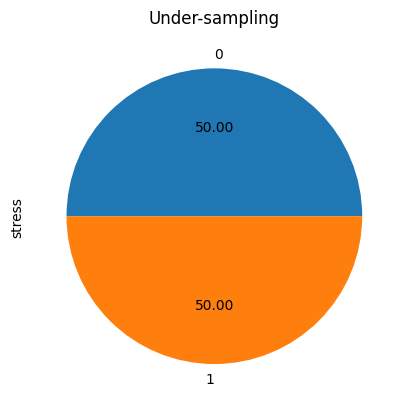

In [12]:
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(sampling_strategy=1) 

X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [13]:
y_res.value_counts()

0    12030
1    12030
Name: stress, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20)

In [15]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [13:35<00:00, 28.11s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.82,0.82,0.82,0.82,6.29
RandomForestClassifier,0.82,0.82,0.82,0.82,50.50
ExtraTreesClassifier,0.82,0.82,0.82,0.82,10.37
QuadraticDiscriminantAnalysis,0.81,0.82,0.82,0.81,1.68
NuSVC,0.81,0.81,0.81,0.81,146.27
SVC,0.81,0.81,0.81,0.81,100.52
AdaBoostClassifier,0.81,0.81,0.81,0.80,45.12
XGBClassifier,0.81,0.81,0.81,0.80,112.32
LogisticRegression,0.80,0.80,0.80,0.80,1.52
